## Plot tremor detection results related to Hikurangi
- lots of comparison to the tremor catalog of Todd et al. 2018!

In [1]:
import os
import pickle
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np
import obspy
from obspy.clients.fdsn.client import Client 
import obspy
import pandas as pd
import scipy.ndimage
import geopy.distance
import random
client = Client('IRIS')
import scipy
import seaborn as sn
from geopy.distance import geodesic

import matplotlib 
#matplotlib.rcParams['font.family']=['Arial']
plt.rcParams.update({'font.size': 14})

### Read in results from detection and classification on Hikurangi stations

In [28]:
# File 1
file_name = 'classifications/J26C_raw.pickle'
with open(file_name, 'rb') as handle:
    j26c_raw = pickle.load(handle)
classification_blocks1 = [block for block in j26c_raw if isinstance(block, list) and len(block) > 0]
j26c_classifications = [record for block in classification_blocks1 for record in block]
#display(j34c_classifications)

# File 2
file_name = 'classifications/J34C_raw.pickle'
with open(file_name, 'rb') as handle:
    j34c_raw = pickle.load(handle)
classification_blocks2 = [block for block in j34c_raw if isinstance(block, list) and len(block) > 0]
j34c_classifications = [record for block in classification_blocks2 for record in block]
#display(g34b_classifications)

# File 3
file_name = 'classifications/J59C_raw.pickle'
with open(file_name, 'rb') as handle:
    j59c_raw = pickle.load(handle)
classification_blocks3 = [block for block in j59c_raw if isinstance(block, list) and len(block) > 0]
j59c_classifications = [record for block in classification_blocks3 for record in block]
#display(g34d_classifications)

# File 4
file_name = 'classifications/J67C_raw.pickle'
with open(file_name, 'rb') as handle:
    j67c_raw = pickle.load(handle)
classification_blocks3 = [block for block in j67c_raw if isinstance(block, list) and len(block) > 0]
j67c_classifications = [record for block in classification_blocks3 for record in block]
#display(g34d_classifications)

In [29]:
# How many T-phases?
print(len([c for c in j26c_classifications if c[2]<2])/len(j26c_classifications))
print(len([c for c in j34c_classifications if c[2]<2])/len(j34c_classifications))
print(len([c for c in j59c_classifications if c[2]<2])/len(j59c_classifications))
print(len([c for c in j67c_classifications if c[2]<2])/len(j67c_classifications))

0.4052912181873051
0.3010863350485992
0.3043061545834189
0.4176267281105991


In [30]:
# Isolate detections consistent with tremor
j26c_threshold = 20
j26c_tremor = [c for c in j26c_classifications if (c[4]>j26c_threshold) & (c[2]>1)]

j34c_threshold = 20
j34c_tremor = [c for c in j34c_classifications if (c[4]>j34c_threshold) & (c[2]>1)]

j59c_threshold = 20
j59c_tremor = [c for c in j59c_classifications if (c[4]>j59c_threshold) & (c[2]>1)]

j67c_threshold = 20
j67c_tremor = [c for c in j67c_classifications if (c[4]>j67c_threshold) & (c[2]>1)]

In [31]:
print(len(j26c_tremor))
print(len(j34c_tremor))
print(len(j59c_tremor))
print(len(j67c_tremor))

3
7
16
709


In [34]:
j26c_color='#253494'
j34c_color='#41b6c4'
j59c_color = '#c7e9b4'
j67c_color = 'cyan'

## Plot all emergent detections, and those consistent with tremor

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


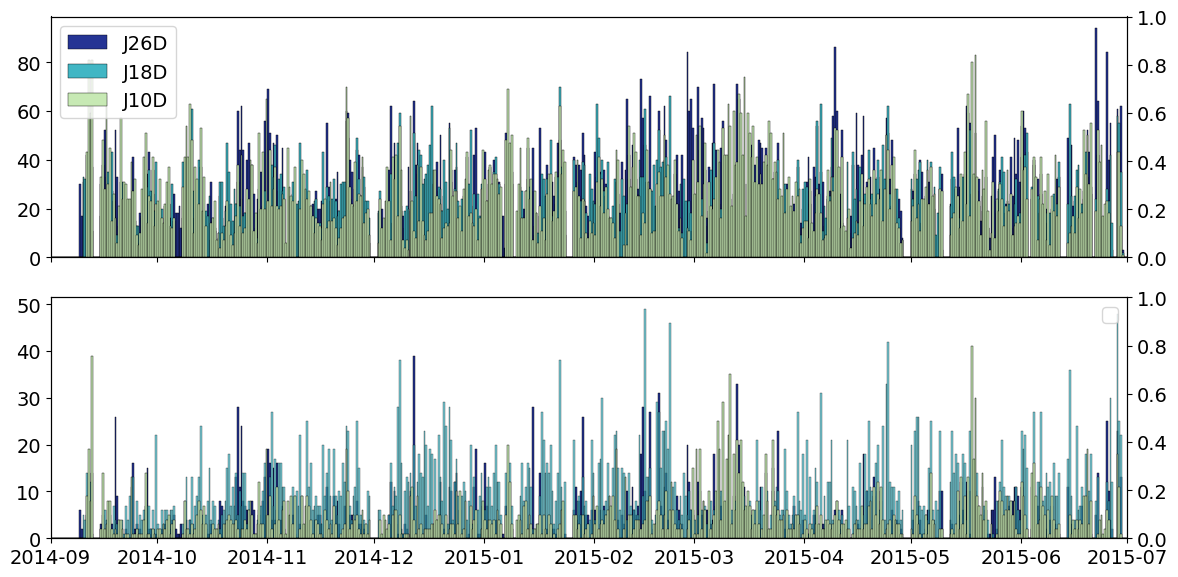

In [23]:
fig,ax = plt.subplots(2,figsize=[12,6],tight_layout=True,sharex=True)

ax[0].set_xlim([datetime.datetime(2014,9,1),datetime.datetime(2015,7,1)])

t1 = datetime.datetime(2013,9,1)
t2 = datetime.datetime(2014,7,1)
timebins = pd.date_range(start=t1, end=t2, freq='12h')
ax[0].hist([c[0][0].datetime for c in j26c_classifications],bins=timebins,label='J26C',color=j26c_color,linewidth=0.3,edgecolor='k');
ax[0].hist([c[0][0].datetime for c in j34c_classifications],bins=timebins,label='J34C',color=j34c_color,linewidth=0.3,edgecolor='k');
ax[0].hist([c[0][0].datetime for c in j59c_classifications],bins=timebins,label='J59C',color=j59c_color,linewidth=0.3,edgecolor='k');
# ax[0].set_title('All STA/LTA detections')
ax0 = ax[0].twinx()
#ax0.hist([t.datetime for t in tremor[0]],bins=timebins,histtype='step',edgecolor='k',label='Todd et al. catalog',linewidth=2);
ax[0].legend()
#ax0.set_ylabel('Todd et al. Catalog')

ax[1].hist([c[0][0].datetime for c in j26c_tremor],bins=timebins,label='J26C',color=j26c_color,linewidth=0.3,edgecolor='k');
ax[1].hist([c[0][0].datetime for c in j34c_tremor],bins=timebins,label='J34C',color=j34c_color,linewidth=0.3,edgecolor='k',alpha=0.7);
ax[1].hist([c[0][0].datetime for c in j59c_tremor],bins=timebins,label='J59C',color=j59c_color,linewidth=0.3,edgecolor='k');
# ax[1].set_title('Cataloged tremor vs. single-station tremor detections (Frequency Ratio > 100)')
ax1 = ax[1].twinx()
#ax1.hist([t.datetime for t in tremor[0]],bins=timebins,histtype='step',edgecolor='k',linewidth=2.5,label='Todd et al. catalog');
#ax1.set_ylabel('Todd et al. Catalog')
# ax[1].set_ylabel('Single-station tremor')
ax1.legend()


# plt.savefig('/Users/zoekrauss/ooi_tremor/tremor_figs/hikurangi_detections.eps', bbox_inches='tight',dpi=400)


### Plot distribution of frequency ratios

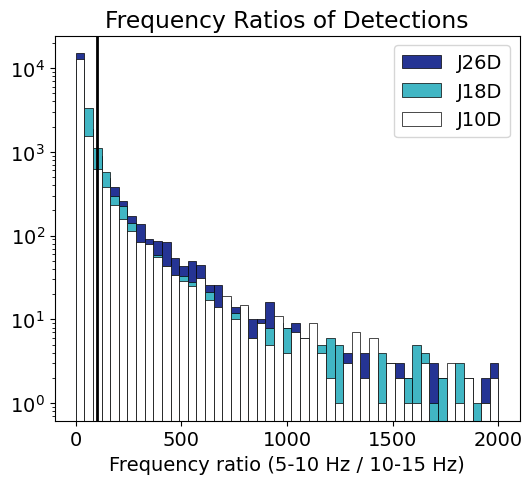

In [24]:
fig,ax = plt.subplots(1,figsize=[6,5])

bins = np.linspace(0,2000,50)
ax.hist([c[4] for c in j26c_classifications],bins=bins,label='J26C',color=j26c_color,edgecolor='k',linewidth=0.5);
ax.hist([c[4] for c in j34c_classifications],bins=bins,label='J34C',color=j34c_color,edgecolor='k',linewidth=0.5);
ax.hist([c[4] for c in j59c_classifications],bins=bins,label='J59C',color='w',edgecolor='k',linewidth=0.5);
#ax.hist([c[4] for c in lobs2_classifications],bins=bins,label='LOBS2',color=lobs6_color,edgecolor='k',linewidth=0.5);
ax.set_yscale('log')
ax.axvline(100,color='k',linewidth=2)
ax.set_title('Frequency Ratios of Detections')
ax.set_xlabel('Frequency ratio (5-10 Hz / 10-15 Hz)')
ax.legend()

# plt.savefig('/Users/zoekrauss/ooi_tremor/tremor_figs/hikurangi_fr.eps', bbox_inches='tight',dpi=400)

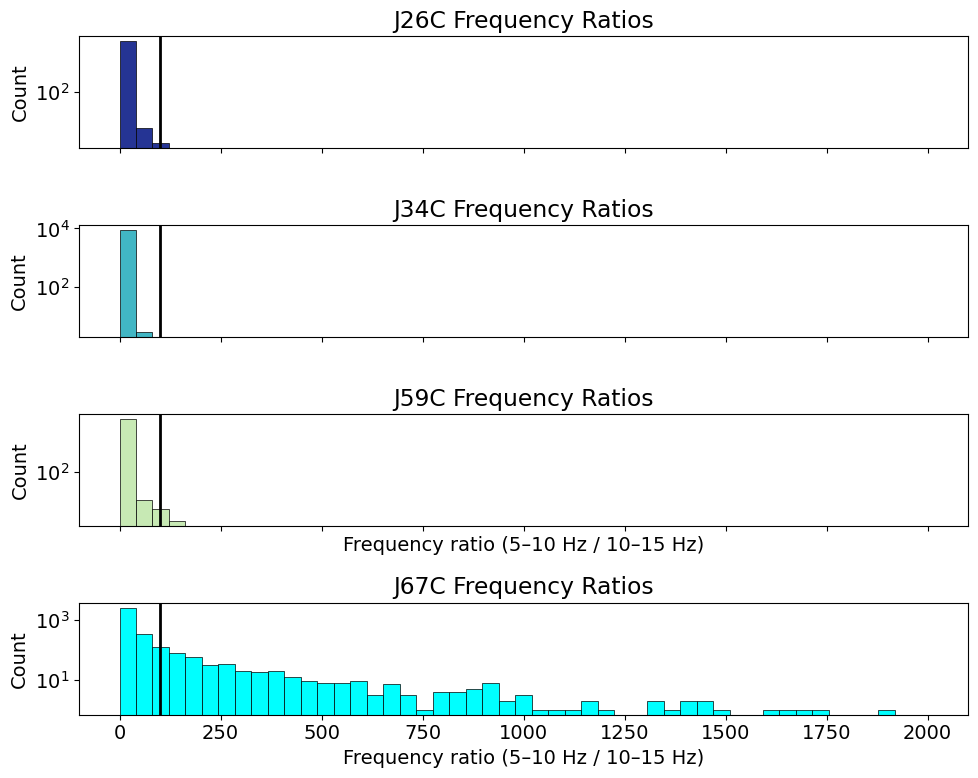

In [35]:
fig, ax = plt.subplots(4, figsize=[10, 8], sharex=True, tight_layout=True)

bins = np.linspace(0, 2000, 50)

# Panel 1: J26C
ax[0].hist([c[4] for c in j26c_classifications],
           bins=bins, color=j26c_color,
           edgecolor='k', linewidth=0.5)
ax[0].axvline(100, color='k', linewidth=2)
ax[0].set_title('J26C Frequency Ratios')
ax[0].set_ylabel('Count')
ax[0].set_yscale('log')

# Panel 2: J34C
ax[1].hist([c[4] for c in j34c_classifications],
           bins=bins, color=j34c_color,
           edgecolor='k', linewidth=0.5)
ax[1].axvline(100, color='k', linewidth=2)
ax[1].set_title('J34C Frequency Ratios')
ax[1].set_ylabel('Count')
ax[1].set_yscale('log')

# Panel 3: J59C
ax[2].hist([c[4] for c in j59c_classifications],
           bins=bins, color=j59c_color,
           edgecolor='k', linewidth=0.5)
ax[2].axvline(100, color='k', linewidth=2)
ax[2].set_title('J59C Frequency Ratios')
ax[2].set_ylabel('Count')
ax[2].set_xlabel('Frequency ratio (5–10 Hz / 10–15 Hz)')
ax[2].set_yscale('log')

# Panel 4: J67C
ax[3].hist([c[4] for c in j67c_classifications],
           bins=bins, color=j67c_color,
           edgecolor='k', linewidth=0.5)
ax[3].axvline(100, color='k', linewidth=2)
ax[3].set_title('J67C Frequency Ratios')
ax[3].set_ylabel('Count')
ax[3].set_xlabel('Frequency ratio (5–10 Hz / 10–15 Hz)')
ax[3].set_yscale('log')

plt.show()


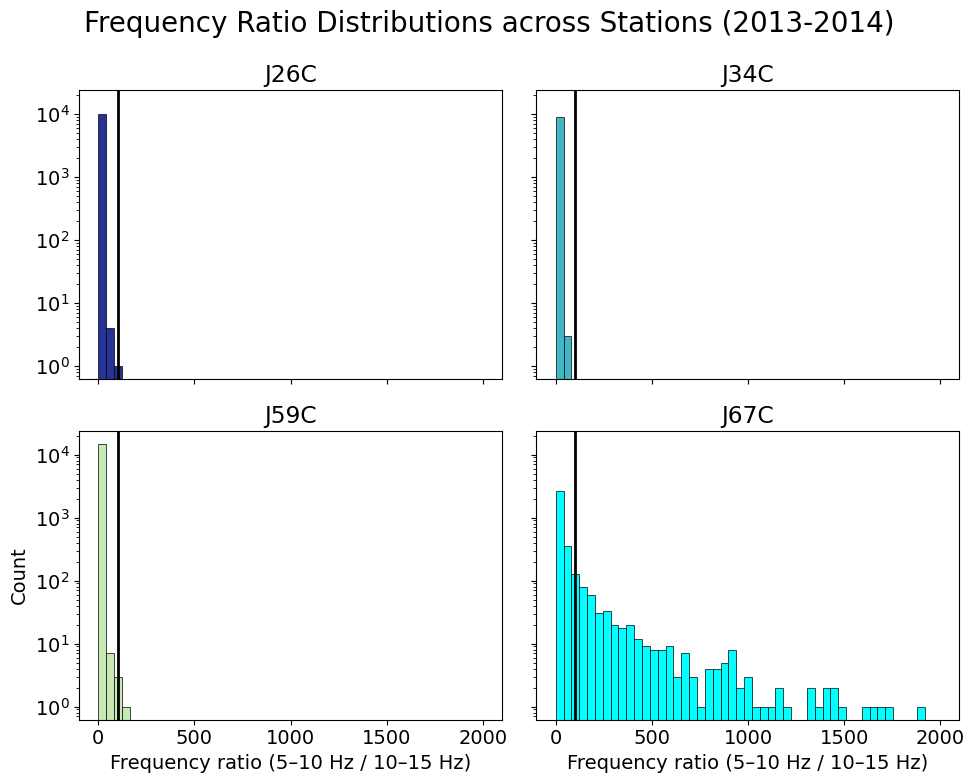

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True, tight_layout=True)

bins = np.linspace(0, 2000, 50)

# Panel [0, 0]: J26C
ax[0, 0].hist([c[4] for c in j26c_classifications],
              bins=bins, color=j26c_color,
              edgecolor='k', linewidth=0.5)
ax[0, 0].axvline(100, color='k', linewidth=2)
ax[0, 0].set_title('J26C')
ax[0, 0].set_yscale('log')

# Panel [0, 1]: J34C
ax[0, 1].hist([c[4] for c in j34c_classifications],
              bins=bins, color=j34c_color,
              edgecolor='k', linewidth=0.5)
ax[0, 1].axvline(100, color='k', linewidth=2)
ax[0, 1].set_title('J34C')
ax[0, 1].set_yscale('log')

# Panel [1, 0]: J59C
ax[1, 0].hist([c[4] for c in j59c_classifications],
              bins=bins, color=j59c_color,
              edgecolor='k', linewidth=0.5)
ax[1, 0].axvline(100, color='k', linewidth=2)
ax[1, 0].set_title('J59C')
ax[1, 0].set_xlabel('Frequency ratio (5–10 Hz / 10–15 Hz)')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_yscale('log')

# Panel [1, 1]: J67C
ax[1, 1].hist([c[4] for c in j67c_classifications],
              bins=bins, color=j67c_color,
              edgecolor='k', linewidth=0.5)
ax[1, 1].axvline(100, color='k', linewidth=2)
ax[1, 1].set_title('J67C')
ax[1, 1].set_xlabel('Frequency ratio (5–10 Hz / 10–15 Hz)')
ax[1, 1].set_yscale('log')

fig.suptitle("Frequency Ratio Distributions across Stations (2013-2014)", fontsize=20)

plt.show()


fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True, tight_layout=True)

bins = np.linspace(0, 2000, 50)

# Panel [0, 0]: J26C
ax[0, 0].hist([c[4] for c in j26c_classifications],
              bins=bins, color=j26c_color,
              edgecolor='k', linewidth=0.5)
ax[0, 0].axvline(100, color='k', linewidth=2)
ax[0, 0].set_title('J26C')
ax[0, 0].set_yscale('log')

# Panel [0, 1]: J34C
ax[0, 1].hist([c[4] for c in j34c_classifications],
              bins=bins, color=j34c_color,
              edgecolor='k', linewidth=0.5)
ax[0, 1].axvline(100, color='k', linewidth=2)
ax[0, 1].set_title('J34C')
ax[0, 1].set_yscale('log')

# Panel [1, 0]: J59C
ax[1, 0].hist([c[4] for c in j59c_classifications],
              bins=bins, color=j59c_color,
              edgecolor='k', linewidth=0.5)
ax[1, 0].axvline(100, color='k', linewidth=2)
ax[1, 0].set_title('J59C')
ax[1, 0].set_xlabel('Frequency ratio (5–10 Hz / 10–15 Hz)')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_yscale('log')

# Panel [1, 1]: J67C
ax[1, 1].hist([c[4] for c in j67c_classifications],
              bins=bins, color=j67c_color,
              edgecolor='k', linewidth=0.5)
ax[1, 1].axvline(100, color='k', linewidth=2)
ax[1, 1].set_title('J67C')
ax[1, 1].set_xlabel('Frequency ratio (5–10 Hz / 10–15 Hz)')
ax[1, 1].set_yscale('log')

plt.show()
## How close in time are our detections to the Todd detections?

In [ ]:
# For each of Todd's tremor detections, when is the closest (in time) STA/LTA detection?

todd_times = tremor[0]

# Compare to EBS3 times
ebs3_times = [e[0] for e in ebs3_tremor]
min_diff1 = []
for tt in todd_times:
    diffs1 = [np.abs(tt-t[0]) for t in ebs3_times]
    diffs2 = [np.abs(tt-t[1]) for t in ebs3_times]
    min_diff1.append(min(min(diffs1),min(diffs2)))
    
# Compare to EBS5 times
ebs5_times = [e[0] for e in ebs5_tremor]
min_diff2 = []
for tt in todd_times:
    diffs1 = [np.abs(tt-t[0]) for t in ebs5_times]
    diffs2 = [np.abs(tt-t[1]) for t in ebs5_times]
    min_diff2.append(min(min(diffs1),min(diffs2)))
    
# Get distance between EBS3 and Todd tremor
station_loc = [-38.694599,178.650604]
ebs3_dist = []
for i in range(len(tremor[0])):
    ebs3_dist.append(geodesic([tremor[1][i],tremor[2][i]],station_loc).km)
    
# Get distance between EBS5 and Todd tremor
station_loc = [-38.9944,178.325699]
ebs5_dist = []
for i in range(len(tremor[0])):
    ebs5_dist.append(geodesic([tremor[1][i],tremor[2][i]],station_loc).km)

In [ ]:
fig,ax = plt.subplots(2,figsize=[12,6],sharex=True)

ax[0].set_xlim([datetime.datetime(2014,9,1),datetime.datetime(2014,11,1)])

# EBS3
ax[0].plot([t.datetime for t in todd_times],min_diff1,'ko',label='Time to nearest detection')
ax[0].axhline(500,color='k',linestyle='--')
ax0 = ax[0].twinx()
ax0.plot([t.datetime for t in todd_times],ebs3_dist,'.',label='Distance to nearest detection')
ax0.set_ylim([0,60])
ax[0].legend()
ax0.legend()
ax[0].set_ylabel('Time (s)')
ax0.set_ylabel('Distance (km)')

# EBS5
ax[1].plot([t.datetime for t in todd_times],min_diff2,'ko')
ax[1].axhline(500,color='k',linestyle='--')
ax1 = ax[1].twinx()
ax1.plot([t.datetime for t in todd_times],ebs5_dist,'.')
ax1.set_ylim([0,60])
ax[1].set_ylabel('Time (s)')
ax1.set_ylabel('Distance (km)')

ax[0].set_xlim([datetime.datetime(2014,9,1),datetime.datetime(2014,11,1)])

# plt.savefig('/Users/zoekrauss/ooi_tremor/tremor_figs/hikurangi_timing.eps', bbox_inches='tight',dpi=400)

## Does the rate of the Todd et al. catalog correspond with the average spacing? (for the Supporting Information)

In [ ]:
# Calculate daily rate of Todd et al.
# Calculate average spacing

# Loop through days
t1 = obspy.UTCDateTime(2014,9,1)
t2 = obspy.UTCDateTime(2014,11,1)
time_bins = pd.date_range(start=t1.datetime, end=t2.datetime, freq='d')

ebs3_rate = []
ebs3_spacing = []
for tt in time_bins:
    
    start = tt
    end = tt + datetime.timedelta(days=1)
    
    check_ind = [i for i,d in enumerate(todd_times) if (d>start) & (d<end)]
    tremor_times = [i for i,d in enumerate(ebs3_times) if (d[0]>start) & (d[0]<end)]
    
    if (len(check_ind)>0) & (len(tremor_times)>0):
        ebs3_rate.append(len(tremor_times))
        ebs3_spacing.append(np.mean([min_diff1[i] for i in check_ind]))

ebs5_rate = []
ebs5_spacing = []
for tt in time_bins:
    
    start = tt
    end = tt + datetime.timedelta(days=1)
    
    check_ind = [i for i,d in enumerate(todd_times) if (d>start) & (d<end)]
    tremor_times = [i for i,d in enumerate(ebs5_times) if (d[0]>start) & (d[0]<end)]
    
    if (len(check_ind)>0) & (len(tremor_times)>0):
        ebs5_rate.append(len(tremor_times))
        ebs5_spacing.append(np.mean([min_diff2[i] for i in check_ind]))

In [ ]:
%matplotlib inline

fig,ax = plt.subplots(1,figsize=[4,4])
ax.plot([1/r for r in ebs3_rate],[s/86400 for s in ebs3_spacing],'.')
ax.set_xlabel('Reciprocal of daily tremor rate')
ax.set_ylabel('Average spacing (days)')
ax.set_title('EBS3')
# Plot 1:1 line
ax.plot(np.linspace(0,1),np.linspace(0,1),'-')
ax.set_xlim([0,0.2])
ax.set_ylim([0,0.2])

In [ ]:
%matplotlib inline

fig,ax = plt.subplots(1,figsize=[4,4])
ax.plot([1/r for r in ebs5_rate],[s/86400 for s in ebs5_spacing],'.')
ax.set_xlabel('Reciprocal of daily tremor rate')
ax.set_ylabel('Average spacing (days)')
ax.set_title('EBS5')
# Plot 1:1 line
ax.plot(np.linspace(0,1),np.linspace(0,1),'-')
ax.set_xlim([0,0.2])
ax.set_ylim([0,0.2])

# plt.savefig('/Users/zoekrauss/ooi_tremor/tremor_figs/ebs5_timing.eps', bbox_inches='tight',dpi=400)

## Distance to tremor versus amplitude

In [ ]:
stations = ['EBS5','EBS3','EBS2','EBS4','LOBS1','LOBS2','LOBS6','LOBS8']
sta_loc = [[-38.9944,178.325699],[-38.694599,178.650604],[-38.7771,178.583496],[-38.688801,178.819901],[-38.592098,178.818695],[-38.620998,179.046097],[-38.977798,178.796005],[-38.843201,178.459396]]

# EBS stations only
ebs_tremor_amp = []
ebs_tremor_dist = []
ebs_tremor_amp_median = []
stations1 = stations[0:4]
sta_loc1 = sta_loc[0:4]
for i in [35,50,55,61,80]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    
    tremor_amp1 = []
    tremor_dist1 = []
    tremor_med1 = []


    for i,s in enumerate(stations1):

        t1 = tremor_t+60
        t2 = tremor_t+150

        st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
        st1.remove_response()
        st1.filter('bandpass',freqmin=3,freqmax=10)
        st1.trim(starttime=t1,endtime=t2)

        tremor_amp1.append(np.max(st1[0].data))
        tremor_med1.append(np.median(st1[0].data))
        tremor_dist1.append(geodesic(tremor_loc,sta_loc1[i]).km)

    ebs_tremor_amp.append(tremor_amp1)
    ebs_tremor_amp_median.append(tremor_med1)
    ebs_tremor_dist.append(tremor_dist1)

# Then the LOBS stations- which don't all measure it each time
    
yes_tremor_amp35 = []
yes_tremor_dist35 = []
no_tremor_amp35 = []
no_tremor_dist35 = []
i = 35
for j in [4,6,7]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    yes_tremor_amp35.append(np.max(st1[0].data))
    yes_tremor_dist35.append(geodesic(tremor_loc,sta_loc[j]).km)
for j in [5]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    no_tremor_amp35.append(np.max(st1[0].data))
    no_tremor_dist35.append(geodesic(tremor_loc,sta_loc[j]).km)

yes_tremor_amp50 = []
yes_tremor_dist50 = []
no_tremor_amp50 = []
no_tremor_dist50 = []
i = 50
for j in [4,6,7]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    yes_tremor_amp50.append(np.max(st1[0].data))
    yes_tremor_dist50.append(geodesic(tremor_loc,sta_loc[j]).km)
for j in [5]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    no_tremor_amp50.append(np.max(st1[0].data))
    no_tremor_dist50.append(geodesic(tremor_loc,sta_loc[j]).km)
    
yes_tremor_amp55 = []
yes_tremor_dist55 = []
no_tremor_amp55 = []
no_tremor_dist55 = []
i = 55
for j in [4,7]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    yes_tremor_amp55.append(np.max(st1[0].data))
    yes_tremor_dist55.append(geodesic(tremor_loc,sta_loc[j]).km)
for j in [5,6]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    no_tremor_amp55.append(np.max(st1[0].data))
    no_tremor_dist55.append(geodesic(tremor_loc,sta_loc[j]).km)
    
yes_tremor_amp61 = []
yes_tremor_dist61 = []
no_tremor_amp61 = []
no_tremor_dist61 = []
i = 61
for j in [6,7]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    yes_tremor_amp61.append(np.max(st1[0].data))
    yes_tremor_dist61.append(geodesic(tremor_loc,sta_loc[j]).km)
for j in [4,5]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    no_tremor_amp61.append(np.max(st1[0].data))
    no_tremor_dist61.append(geodesic(tremor_loc,sta_loc[j]).km) 
    
yes_tremor_amp80 = []
yes_tremor_dist80 = []
no_tremor_amp80 = []
no_tremor_dist80 = []
i = 80
for j in [6,7]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    yes_tremor_amp80.append(np.max(st1[0].data))
    yes_tremor_dist80.append(geodesic(tremor_loc,sta_loc[j]).km)
for j in [4,5]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    no_tremor_amp80.append(np.max(st1[0].data))
    no_tremor_dist80.append(geodesic(tremor_loc,sta_loc[j]).km)

In [ ]:
%matplotlib widget


labels = ['2014-10-15T03:47:59',
         '2014-10-16T08:26:59',
         '2014-10-19T09:04:59',
         '2014-10-21-20:51:00',
         '2014-10-25T04:50:00']

colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

fig,ax = plt.subplots(1,figsize=[7,7])
for i in range(len(ebs_tremor_amp)):
    ax.plot(ebs_tremor_dist[i],ebs_tremor_amp[i],'o',label=labels[i],color=colors[i],markeredgewidth=0.5,markeredgecolor='k',markersize=15)

ax.set_yscale('log')
# ax.set_ylim([1e-6,1e-4])
ax.set_title('')

ax.set_xlabel('Distance from tremor (km)')
ax.set_ylabel('Amplitude (m/s)')
ax.legend()

# plt.savefig('/Users/zoekrauss/ooi_tremor/individual_detections/hikurangi_amplitudes_ebsonly.eps', bbox_inches='tight',dpi=400)